<a href="https://colab.research.google.com/github/khelifaYacine/Analyse-de-la-qualit-des-produits-alimentaires/blob/main/Analyse_la_qualit%C3%A9_d'aliments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Analyse de donner d'un dataset de Résultats des contrôles officiels sanitaires : dispositif d'information  Alim’confiance**

Le décret relatif à la transparence des contrôles de l’État dans le domaine de la sécurité sanitaire des aliments en France publié le 17 décembre 2016 généralise l’expérimentation menée à Paris et à Avignon de juillet à décembre 2015. La publication des résultats des contrôles réalisés à partir du 1er mars 2017 dans tous les établissements de la chaîne alimentaire sera effective à partir du 3 avril 2017, sur le site internet www.alim-confiance.gouv.fr.

**Couverture territoriale France**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importation du fichers

In [ ]:
df = pd.read_csv ("/content/drive/MyDrive/Data.gouv pour teste et mon site internet streamlit/Agriculture /export_alimconfiance.csv", sep = ";")
statistique_trafique = pd.read_csv ("/content/drive/MyDrive/Data.gouv pour teste et mon site internet streamlit/Agriculture /statistiques_trafique.csv")
df.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,SARL AUBERGE DU DOUBLE SIX,30121048000010,24 PL GENERAL LECLERC,80220,GAMACHES,16793484,2023-04-25T02:00:00+02:00,Restaurant,Satisfaisant,NaN,"49.985274,1.561386",Restaurant,Autres
1,SUPER-U (COLOMBELLES DISTRIBUTION),30122377200031,RD 403,14460,COLOMBELLES,16787460,2023-04-20T02:00:00+02:00,Rayon boucherie-charcuterie,Très satisfaisant,NaN,NaN,Rayon boucherie-charcuterie,Autres
2,MONSIEUR PHILIPPE MARIOTTE,31084873400029,286 RUE DU CENTRE,74260,LES GETS,16740394,2023-02-23T01:00:00+01:00,Restaurant,Satisfaisant,NaN,"46.15861,6.677963",Restaurant,Autres
3,FOGGIA RISTORANTE (SAS FOGGIA),30609467300010,120 R PDT FRANCOIS MITTERRAND,91160,LONGJUMEAU,16898106,2023-08-03T02:00:00+02:00,Restaurant,Satisfaisant,NaN,"48.693903,2.293431",Restaurant,Autres
4,FRANPRIX (SOC DISTRIBUTION SODISCO SARL),33427109500013,"4, PLACE DU MOUSTIER",92210,SAINT CLOUD,16864116,2023-07-04T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.844091,2.219818",Alimentation générale,Autres


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32326 entries, 0 to 32325
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           32325 non-null  object
 1   SIRET                               32326 non-null  object
 2   Adresse_2_UA                        31864 non-null  object
 3   Code_postal                         32326 non-null  object
 4   Libelle_commune                     32326 non-null  object
 5   Numero_inspection                   32326 non-null  object
 6   Date_inspection                     32326 non-null  object
 7   APP_Libelle_activite_etablissement  32326 non-null  object
 8   Synthese_eval_sanit                 32326 non-null  object
 9   Agrement                            8277 non-null   object
 10  geores                              31465 non-null  object
 11  filtre                              24011 non-null  ob

Analyse de valeurs manquantes

In [ ]:
df.isnull ().sum()

APP_Libelle_etablissement                 1
SIRET                                     0
Adresse_2_UA                            462
Code_postal                               0
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              24049
geores                                  861
filtre                                 8315
ods_type_activite                         0
dtype: int64

In [ ]:
df.describe()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
count,32325,32326,31864,32326,32326,32326,32326,32326,32326,8277,31465,24011,32326
unique,25586,28574,26804,5010,8461,32326,311,149,4,6425,26698,96,7
top,ECOLE PRIMAIRE PUBLIQUE,39814347900069,LE BOURG,75015,Paris 15e Arrondissement,16793484,2023-12-12T01:00:00+01:00,Restaurant,Satisfaisant,72264002,"48.859,2.347",Restaurant,Autres
freq,137,12,94,467,448,1,262,11693,18392,9,40,11693,24734


Vu le nombre important das valeurs manquante de la colonne "agrément" on préfaire la supp, et ne pas l'inclure dans l'études. Sachant que notre objectif d'études ne sera pas dans le but de prendre en concédération les agréments.
- Egalement pour "Adresse_2_UA" qui nous intersse pas vraiment sachant qu'on possède le code postale de la commune.
- On supprime aussi "filtre" qui semble identique à une autre colone de type dactivité.
- ainsi on fait pariel pour "Geaores" qui sont les données géographique.


In [ ]:
Aliment_qualite = df.drop(["Agrement", "Adresse_2_UA", "filtre", "geores"], axis = 1,) #suppression de la colone Agrément qui à enormément de valeur manquante qui aide pas a l'étude

On converter la colonne Date_inspection qui est en type str dans le dataset

In [ ]:
Aliment_qualite["Date_inspection"] = pd.to_datetime (Aliment_qualite["Date_inspection"], utc = True)

In [ ]:
Aliment_qualite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32326 entries, 0 to 32325
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   APP_Libelle_etablissement           32325 non-null  object             
 1   SIRET                               32326 non-null  object             
 2   Code_postal                         32326 non-null  object             
 3   Libelle_commune                     32326 non-null  object             
 4   Numero_inspection                   32326 non-null  object             
 5   Date_inspection                     32326 non-null  datetime64[ns, UTC]
 6   APP_Libelle_activite_etablissement  32326 non-null  object             
 7   Synthese_eval_sanit                 32326 non-null  object             
 8   ods_type_activite                   32326 non-null  object             
dtypes: datetime64[ns, UTC](1), object(8)
mem

In [ ]:
Aliment_qualite.head()#réaffichage de notre data... sachant que le NAN de nom société a été laissé exprès

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,ods_type_activite
0,SARL AUBERGE DU DOUBLE SIX,30121048000010,80220,GAMACHES,16793484,2023-04-25 00:00:00+00:00,Restaurant,Satisfaisant,Autres
1,SUPER-U (COLOMBELLES DISTRIBUTION),30122377200031,14460,COLOMBELLES,16787460,2023-04-20 00:00:00+00:00,Rayon boucherie-charcuterie,Très satisfaisant,Autres
2,MONSIEUR PHILIPPE MARIOTTE,31084873400029,74260,LES GETS,16740394,2023-02-23 00:00:00+00:00,Restaurant,Satisfaisant,Autres
3,FOGGIA RISTORANTE (SAS FOGGIA),30609467300010,91160,LONGJUMEAU,16898106,2023-08-03 00:00:00+00:00,Restaurant,Satisfaisant,Autres
4,FRANPRIX (SOC DISTRIBUTION SODISCO SARL),33427109500013,92210,SAINT CLOUD,16864116,2023-07-04 00:00:00+00:00,Alimentation générale,Satisfaisant,Autres


# Partie Analyse et visualisation

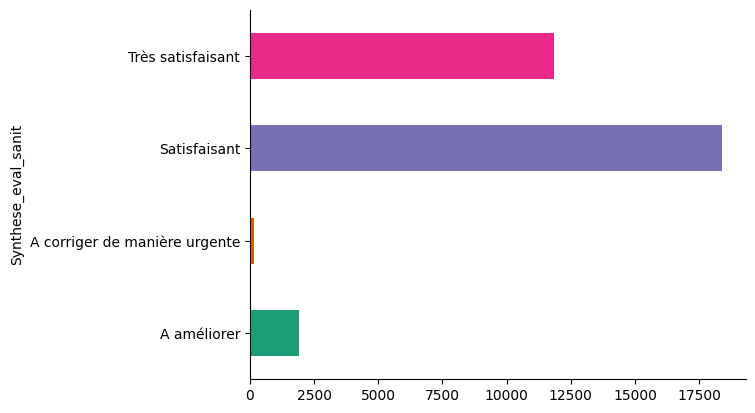

In [ ]:
# @title Synthese_eval_sanit

Aliment_qualite.groupby('Synthese_eval_sanit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

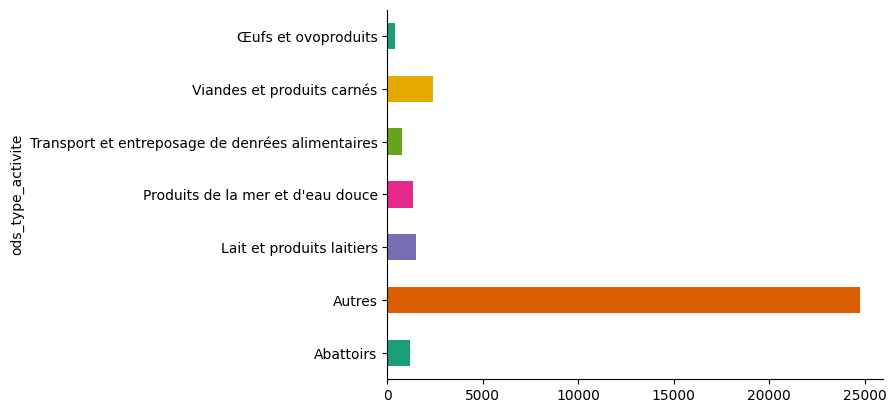

In [ ]:
# @title ods_type_activite
Aliment_qualite.groupby('ods_type_activite').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

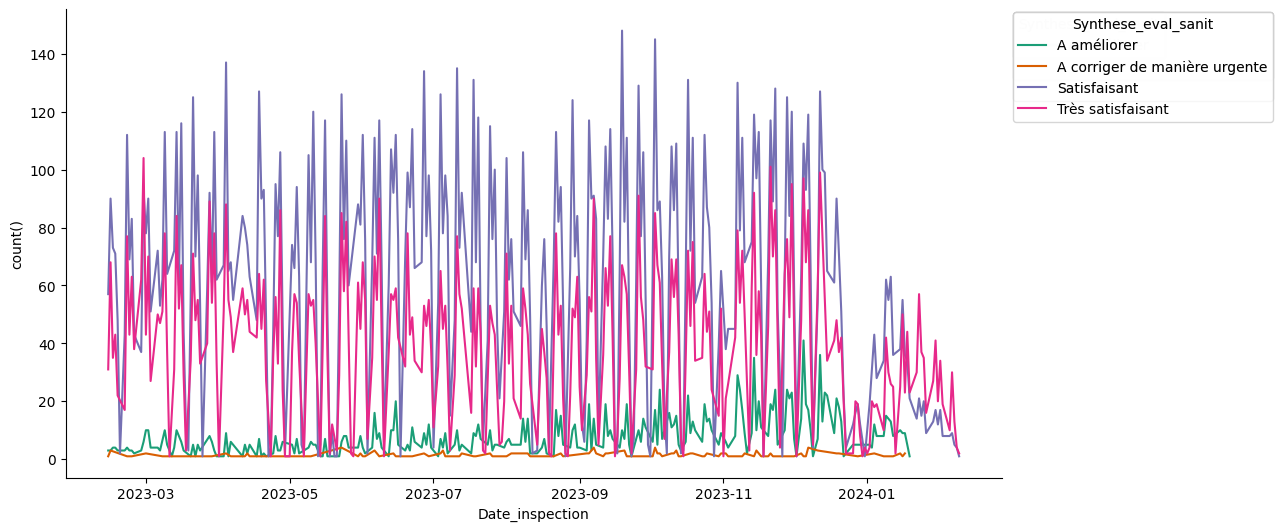

In [ ]:
# @title Date_inspection vs count()
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date_inspection']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date_inspection'}, axis=1)
              .sort_values('Date_inspection', ascending=True))
  xs = counted['Date_inspection']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Aliment_qualite.sort_values('Date_inspection', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Synthese_eval_sanit')):
  _plot_series(series, series_name, i)
  fig.legend(title='Synthese_eval_sanit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_inspection')
_ = plt.ylabel('count()')

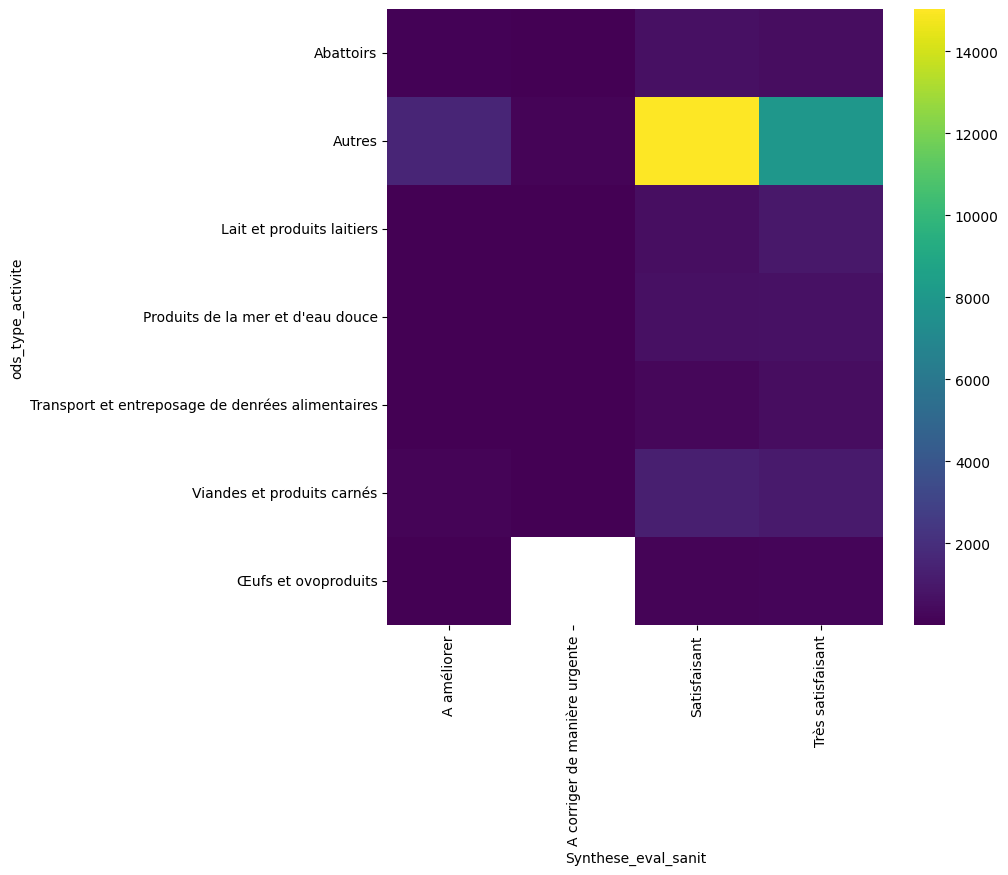

In [ ]:
# @title Synthese_eval_sanit vs ods_type_activite

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ods_type_activite'].value_counts()
    for x_label, grp in Aliment_qualite.groupby('Synthese_eval_sanit')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Synthese_eval_sanit')
_ = plt.ylabel('ods_type_activite')

In [ ]:
# Analyse de satisfaction

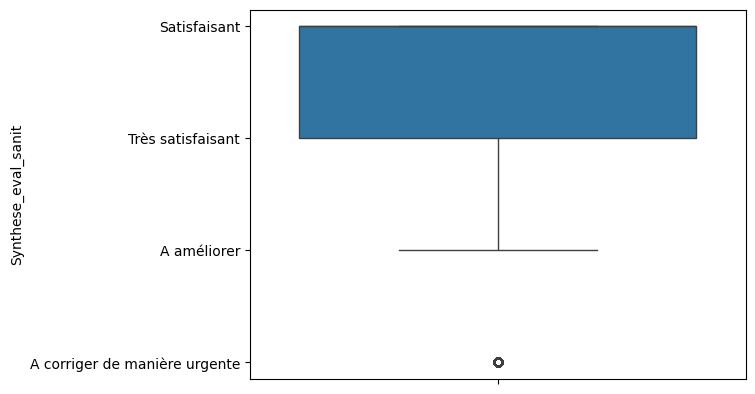

In [ ]:
sns.boxplot(Aliment_qualite["Synthese_eval_sanit"]);
plt.show()


- Analyse de satisfaction par secteur